In [93]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [94]:
# import csv
popular_df = pd.read_csv("data/popular_data2.csv",encoding="utf-8")



popular_df.rename(columns = {"Unnamed: 0": 'ID',"nrgy":"energy","dnce":"danceability", "dur":"duration", "pop": "popularity"}, inplace = True)
#popular_df.set_index("ID")
popular_df

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [95]:
popular_df.dtypes

ID               int64
title           object
artist          object
top genre       object
year             int64
bpm              int64
energy           int64
danceability     int64
dB               int64
live             int64
val              int64
duration         int64
acous            int64
spch             int64
popularity       int64
dtype: object

In [96]:
popular_yr = popular_df.loc[popular_df["year"] >= 2016]
popular_yr

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [97]:
genre = popular_yr["top genre"].value_counts()
genre


top_10 = genre.iloc[0:10]
top_10
    
    

dance pop                    122
pop                           24
canadian pop                  16
electropop                    12
british soul                   6
canadian contemporary r&b      6
edm                            5
big room                       4
latin                          4
art pop                        4
Name: top genre, dtype: int64

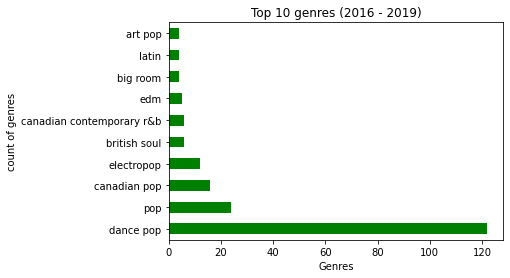

<Figure size 432x288 with 0 Axes>

In [102]:
top_10.plot(kind = "barh", facecolor = "green", title = "Top 10 genres (2016 - 2019)") 
plt.ylabel("count of genres")
plt.xlabel("Genres")

plt.show()
plt.tight_layout()

In [99]:
artist = popular_yr["artist"].value_counts()
artist

Shawn Mendes        10
The Chainsmokers    10
DNCE                 7
Ed Sheeran           7
Adele                6
                    ..
John Legend          1
Dan + Shay           1
Janet Jackson        1
Sigala               1
Sam Smith            1
Name: artist, Length: 109, dtype: int64

In [100]:
song = popular_yr["title"].value_counts()
song

First Time                        2
Kissing Strangers                 2
All I Ask                         2
Girls Like You (feat. Cardi B)    1
Chun-Li                           1
                                 ..
Let Me                            1
Starboy                           1
My My My!                         1
Despacito - Remix                 1
Rich Love (with Seeb)             1
Name: title, Length: 237, dtype: int64

In [101]:
s = popular_df.loc[popular_df["artist"] == "Shawn Mendes"]
s

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
280,281,Stitches,Shawn Mendes,canadian pop,2015,150,75,75,-7,5,76,207,2,7,78
378,379,Stitches,Shawn Mendes,canadian pop,2016,150,75,75,-7,5,76,207,2,7,78
411,412,Don't Be A Fool,Shawn Mendes,canadian pop,2016,175,34,47,-6,10,27,216,60,4,65
421,422,I Know What You Did Last Summer,Shawn Mendes,canadian pop,2016,114,77,68,-5,16,72,224,11,10,57
446,447,Treat You Better,Shawn Mendes,canadian pop,2017,83,82,44,-4,11,75,188,11,34,84
450,451,Mercy,Shawn Mendes,canadian pop,2017,148,66,56,-5,11,36,209,13,8,81
512,513,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2018,122,81,87,-4,8,97,199,38,6,84
515,516,In My Blood,Shawn Mendes,canadian pop,2018,140,71,62,-7,13,49,211,6,7,83
538,539,Youth (feat. Khalid),Shawn Mendes,canadian pop,2018,100,60,53,-7,13,32,191,56,12,75
547,548,Nervous,Shawn Mendes,canadian pop,2018,122,62,84,-7,13,74,164,4,8,71
